# Metrics

## Classification Metric

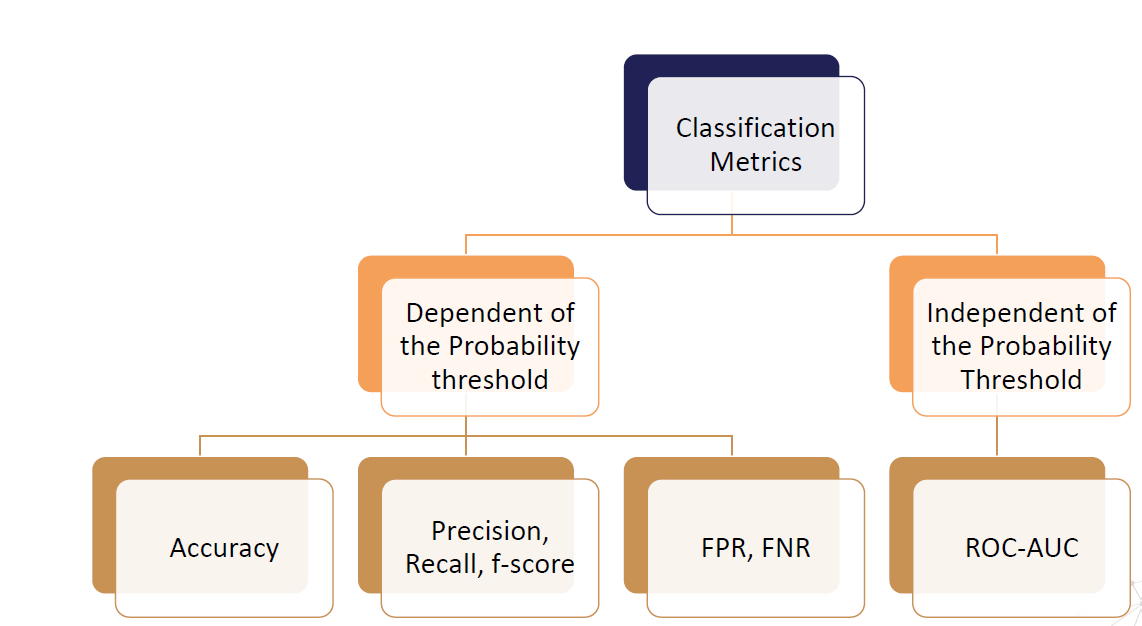

### Accuracy

Percentage or fraction of correct predictions

Fraction of the predictions that the model got right.

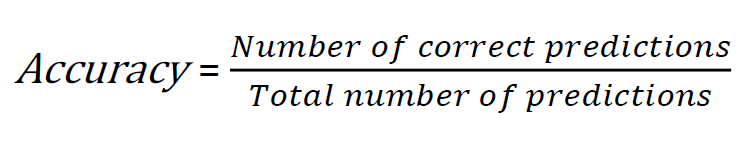

### Confusion Matrix

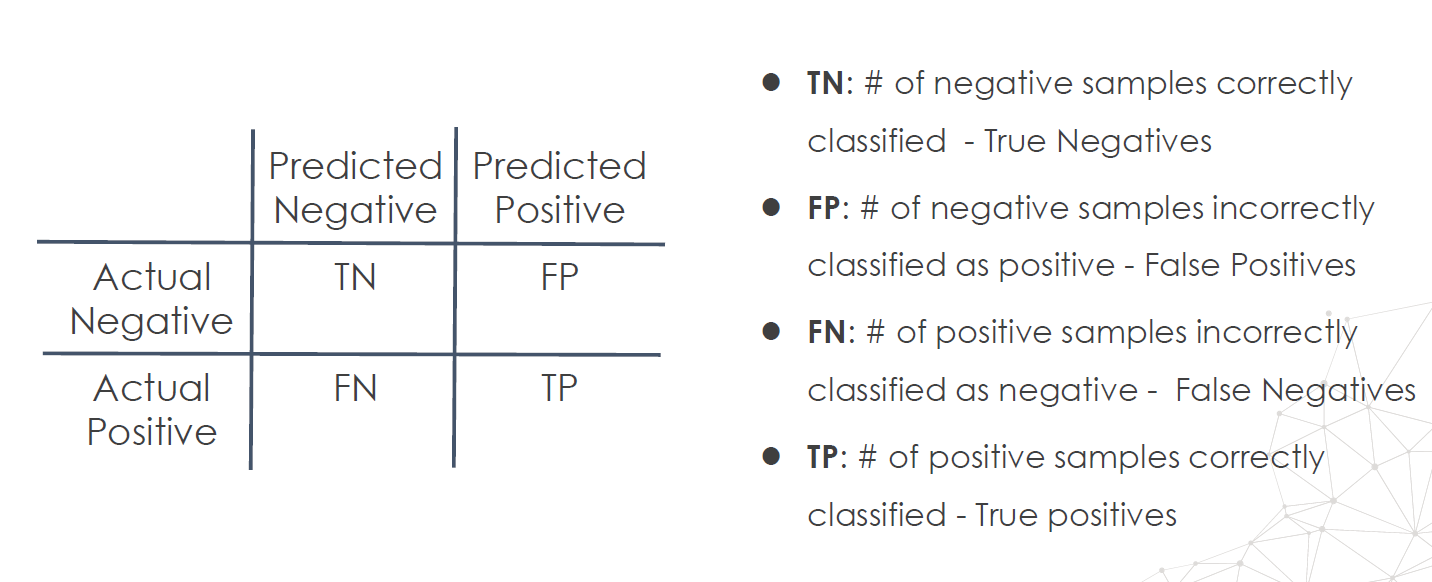

### Precision and Recall

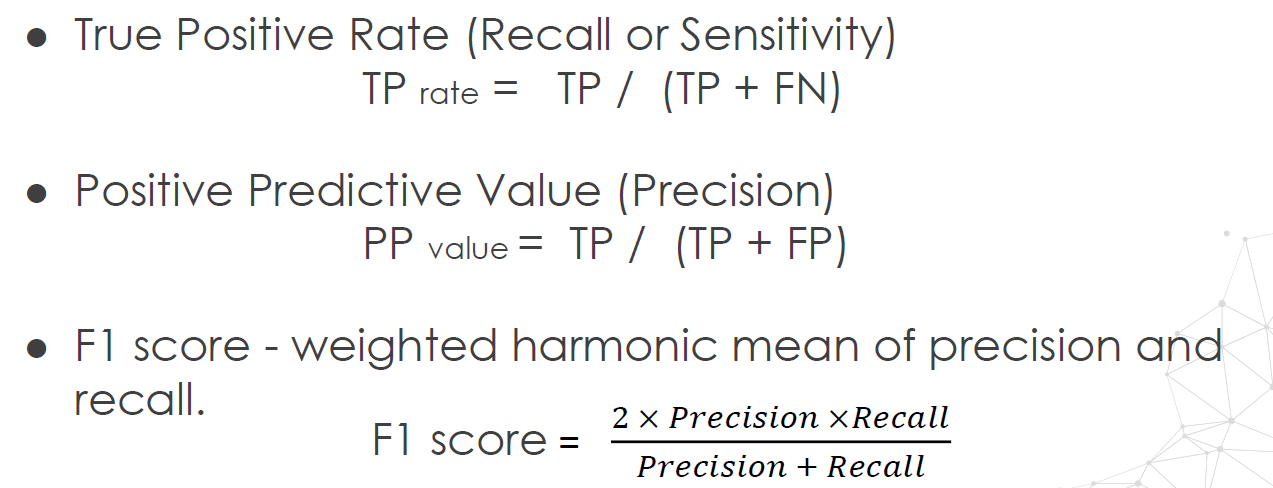

###FPR and FNR

False Positive Rate, FPR = FP / (FP + TN)

False Negative Rate FNR = FN / (TP + FN)

### Receiving Operating Characteristic Curve (ROC Curve)

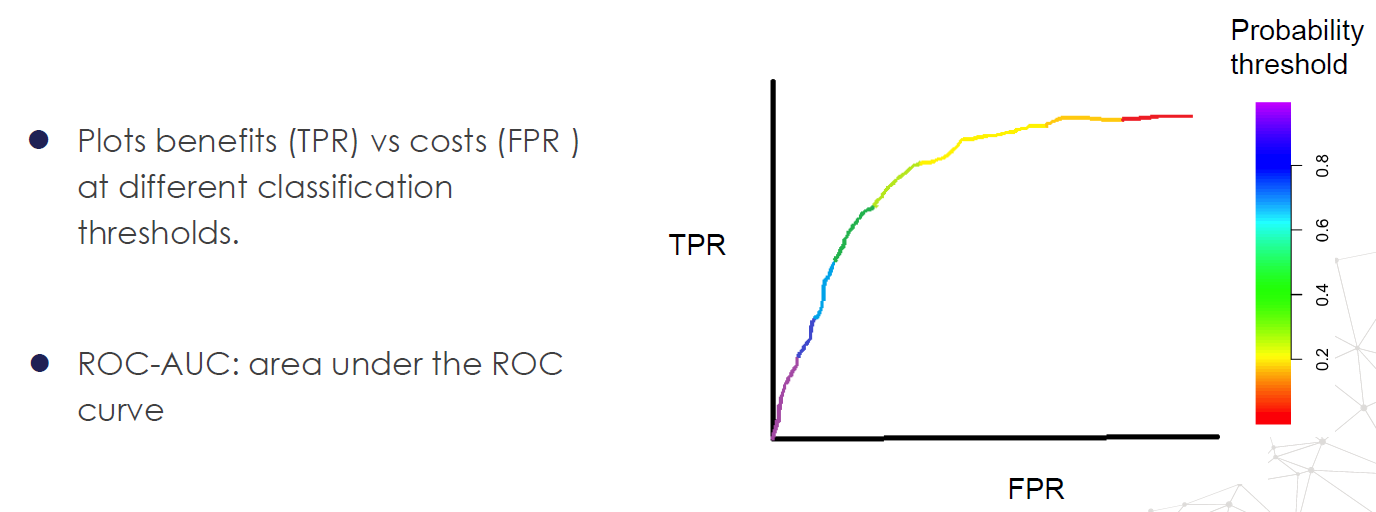

### Loss Function

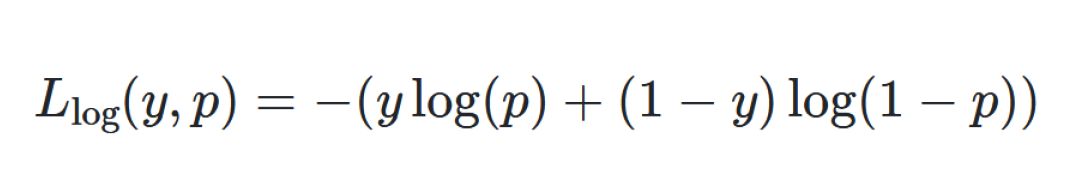

## Regression Metrics

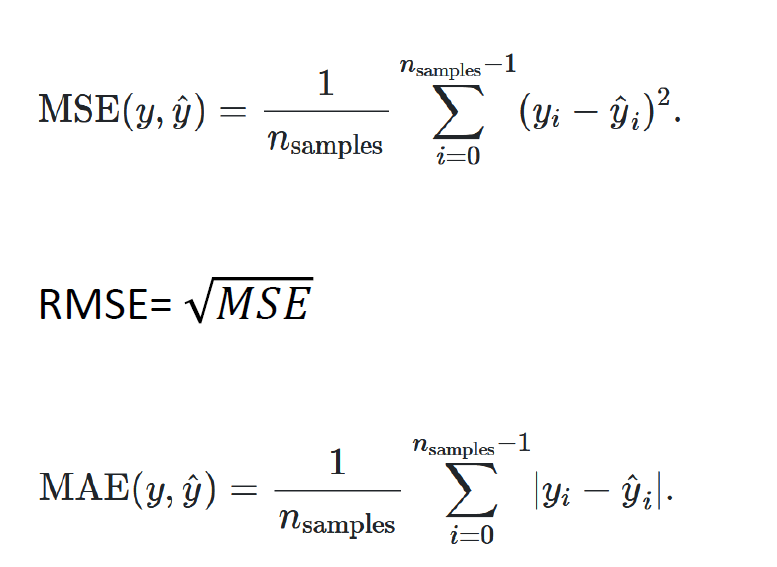




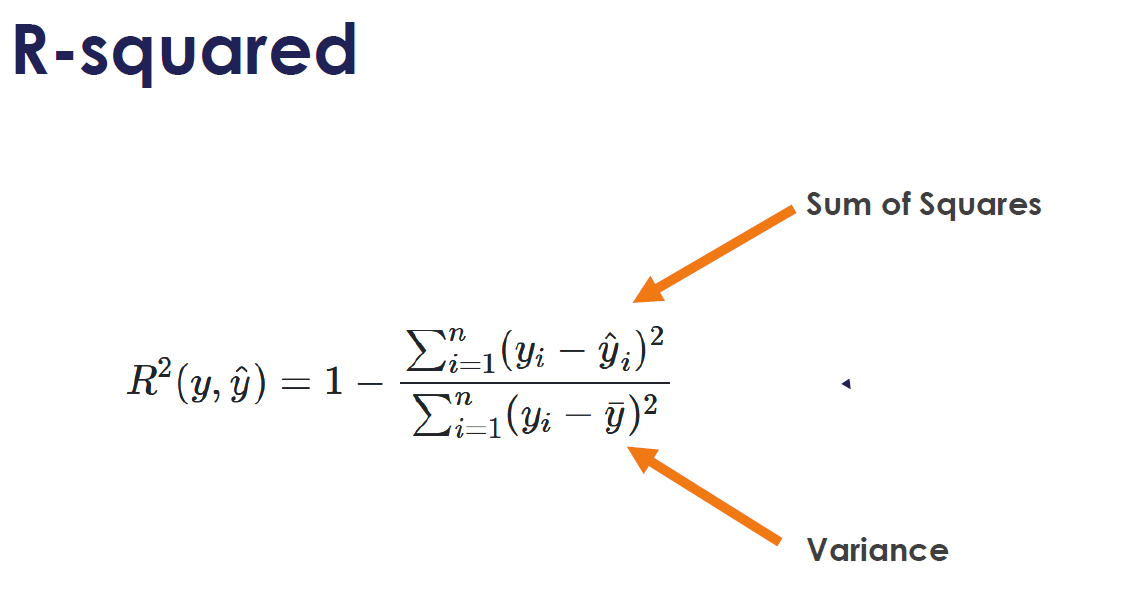

## Metric Optimization

some of them must be lower and some of them must be higher

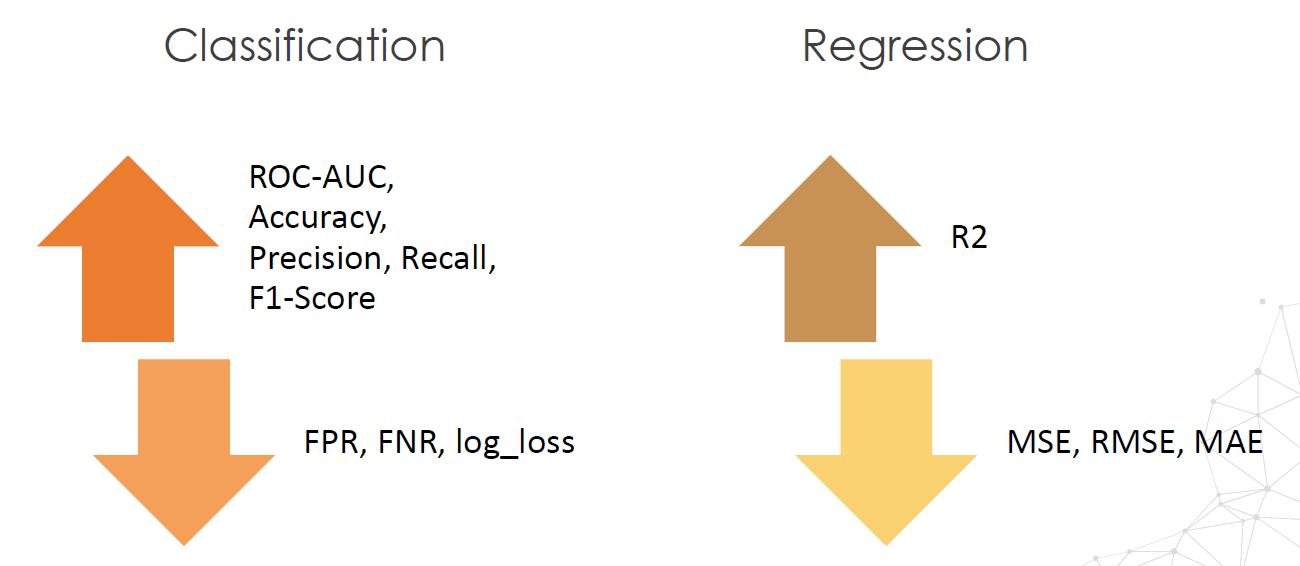

### Scikit-learn Metrics

in scikit learn we use the negative values of metrics that must be lower to be a better performance(by this we can easily compare them by ordinery operators like > because -1 will be > than -100).

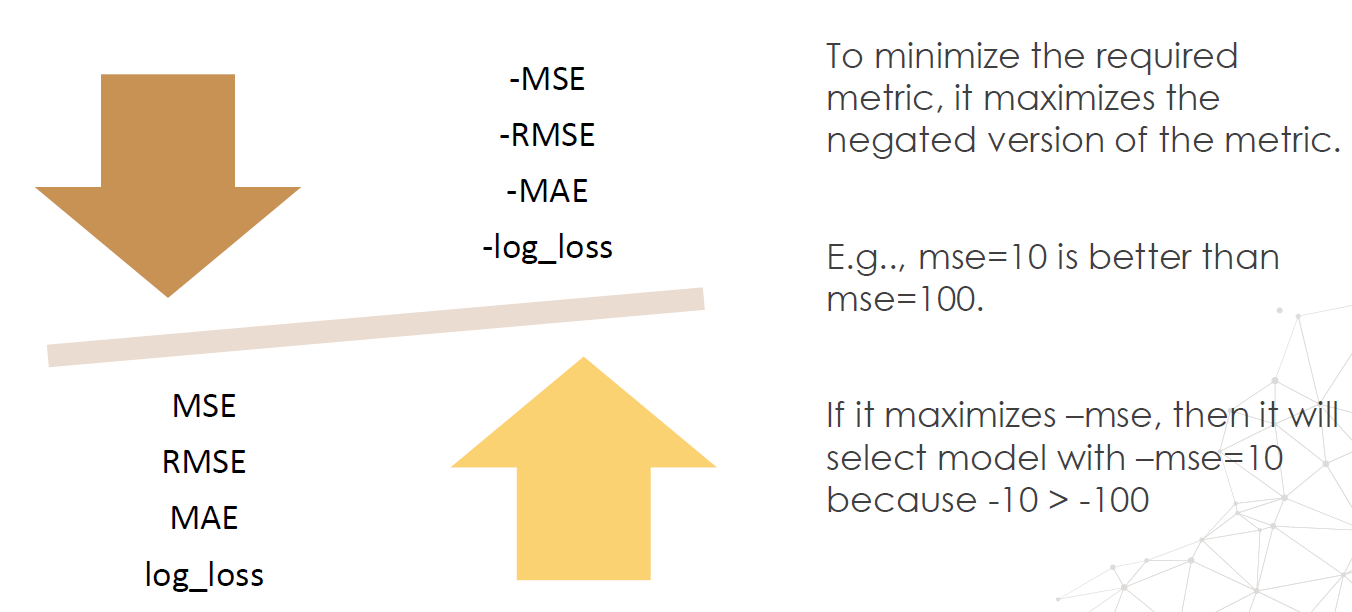

### Making your own performance metric

In case you want to optimize a metric that is not available in sklearn, you can create it very easily.

#### Confusion matrix

We will use the [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
) function from sklearn to return the false positive, false negatives, true positives and true negatives, to construct the false negative rate.


TN | FP

FN | TP

#### False Negative Rate

Because it is a dangerous disease, I want to minimize the number of false negatives cases (the false negative rate). That is, I want to minimize the number of cases where the tumor in a patient is malign (1) and it is wrongly classified as benign (0). This way, we can offer treatment to as many patients as possible.

Because the **False Negative Rate** is not a metric available in sklearn, we need to create a function ourselves.

We will use the [make_scorer](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) function from sklearn:

this is with the default threshhold(0.5)

In [ ]:
# OTHER


# in classificatio use this code to know how many labales assigned to each class

#but first you must map it
# y.value_counts() / len(y)

In [ ]:
from sklearn.metrics import confusion_matrix, make_scorer

In [ ]:
# function returns the FNR given probabilities and the 
# grand truth

def fnr(y_true, y_pred):
    
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred, labels=[0,1]).ravel()
    
    FNR = fn / (tp + fn)
    
    return FNR    

In [ ]:
fnr_score = make_scorer(
    fnr,
    greater_is_better=False, # smaller is better
    needs_proba=False,
)

In [ ]:
# for showing the Hyperparameter space

# results is a data frame
# results = pd.DataFrame(search.cv_results_)[['params', 'mean_test_score', 'std_test_score']]

#results.sort_values(by='mean_test_score', ascending=False, inplace=True)

#results.reset_index(drop=True, inplace=True)

#results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)

#plt.ylim(-0.3, 0)
#plt.ylabel('Mean False Negative Rate')
#plt.xlabel('Hyperparameter space')

#### Scoring Function that needs a probability

our own threshhold for example

In [ ]:
def fnr(y_true, y_pred):
    # our threshhold
    y_pred_class = np.where(y_pred > 0.37, 1, 0)
    
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred_class, labels=[0,1]).ravel()
    
    FNR = fn / (tp + fn)
    
    return FNR

In [ ]:
fnr_score = make_scorer(
    fnr,
    greater_is_better=False, # smaller is better
    needs_proba=True,
)

In [ ]:
# for showing the Hyperparameter space

# results is a data frame
# results = pd.DataFrame(search.cv_results_)[['params', 'mean_test_score', 'std_test_score']]

#results.sort_values(by='mean_test_score', ascending=False, inplace=True)

#results.reset_index(drop=True, inplace=True)

#results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)

#plt.ylim(-0.3, 0)
#plt.ylabel('Mean False Negative Rate')
#plt.xlabel('Hyperparameter space')

### Metrics available in scikit-learn

https://scikit-learn.org/stable/modules/model_evaluation.html#the-scoring-parameter-defining-model-evaluation-rules